# Visualiztion using R

In [1]:
# libs to be used

library("dplyr")
library("ggplot2")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
file_path <- "C:\\Users\\ajoor\\Desktop\\Projects\\LoanPrediction\\Data\\df.csv"

In [3]:
df <- read.csv(file_path)

In [4]:
head(df)

X,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,None,Graduate,No,5849,0,126,360,Good,Urban,Y
1,LP001003,Male,Yes,One,Graduate,No,4583,1508,128,360,Good,Rural,N
2,LP001005,Male,Yes,None,Graduate,Yes,3000,0,66,360,Good,Urban,Y
3,LP001006,Male,Yes,None,Not Graduate,No,2583,2358,120,360,Good,Urban,Y
4,LP001008,Male,No,None,Graduate,No,6000,0,141,360,Good,Urban,Y
5,LP001011,Male,Yes,two,Graduate,Yes,5417,4196,267,360,Good,Urban,Y


In [5]:
str(df)

'data.frame':	614 obs. of  14 variables:
 $ X                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Loan_ID          : Factor w/ 614 levels "LP001002","LP001003",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 3 levels "Female","Male",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Married          : Factor w/ 3 levels "No","UnKnown",..: 1 3 3 3 1 3 3 3 3 3 ...
 $ Dependents       : Factor w/ 5 levels "More than three",..: 2 3 2 2 2 4 2 1 4 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 2 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 3 levels "No","UnKnown",..: 1 1 3 1 1 3 1 1 1 1 ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : num  126 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : num  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : Factor w/ 3 levels "Bad","Good","Unkown": 2 2 2 2 2 2 2 1 2 2 ...
 $ Property_Area    : Fac

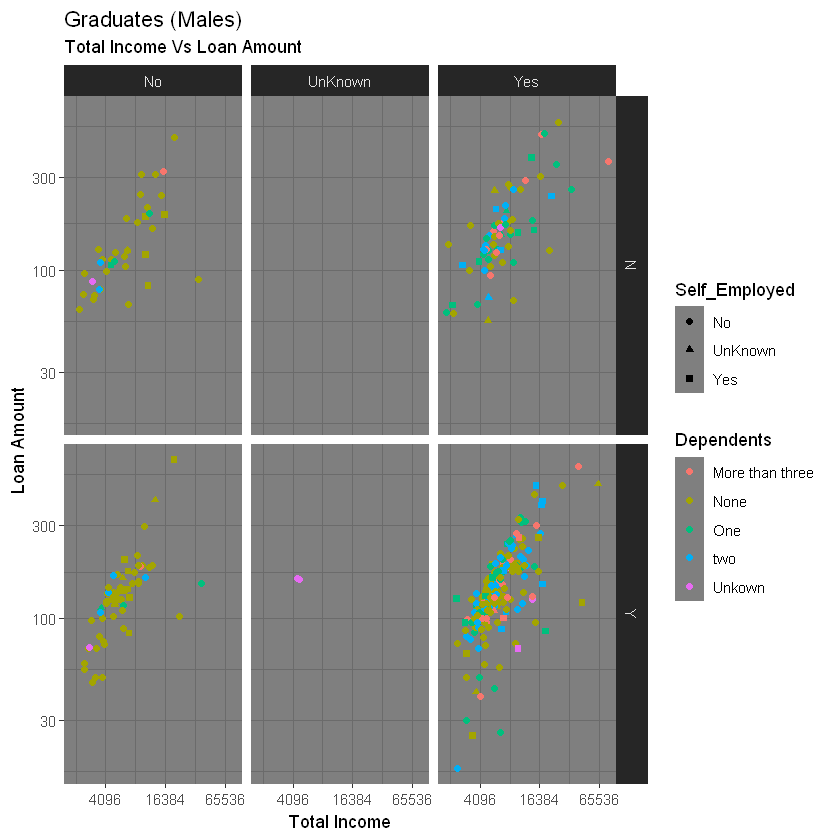

In [6]:
df  %>% filter(Education=="Graduate" & Gender=="Male") %>% 
    ggplot(aes(ApplicantIncome+CoapplicantIncome,LoanAmount, color=Dependents, shape =Self_Employed)) + 
    geom_point() +
    scale_x_continuous(trans = "log2") +
    scale_y_continuous(trans = "log10") +
    facet_grid(rows=vars(Loan_Status),cols=vars(Married)) +
    labs(title="Graduates (Males)", subtitle="Total Income Vs Loan Amount")  +
    xlab("Total Income") +
    ylab("Loan Amount") + theme_dark()

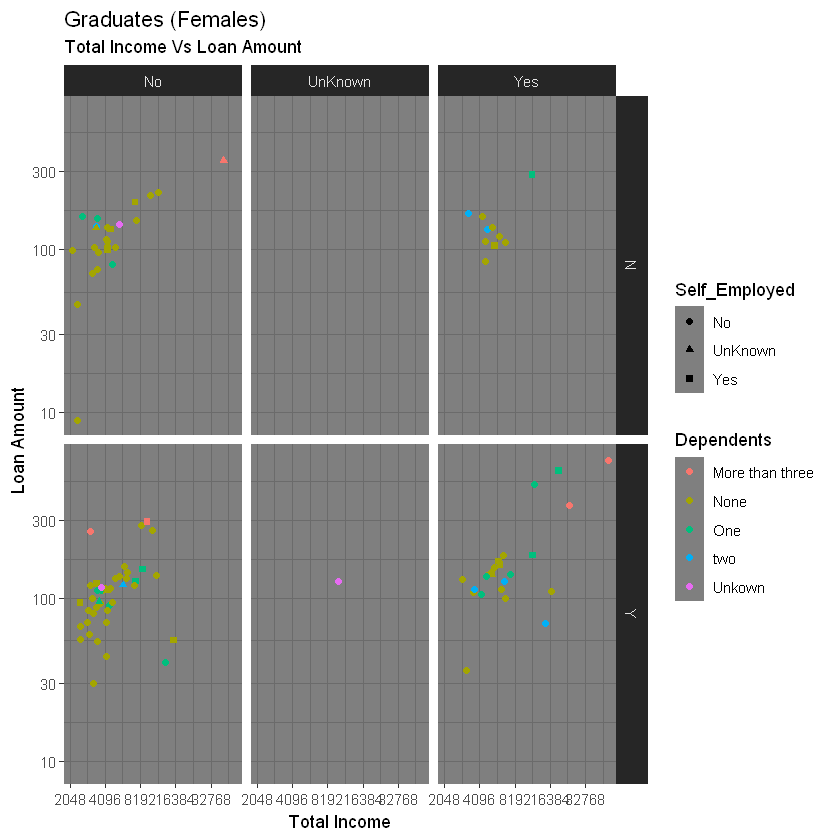

In [7]:
df %>%  filter(Education=="Graduate" & Gender!="Male") %>% 
    ggplot(aes(ApplicantIncome+CoapplicantIncome,LoanAmount, color=Dependents, shape =Self_Employed)) + 
    geom_point() +
    scale_x_continuous(trans = "log2") +
    scale_y_continuous(trans = "log10") +
    facet_grid(rows=vars(Loan_Status),cols=vars(Married)) +
    labs(title="Graduates (Females)", subtitle="Total Income Vs Loan Amount") +
    xlab("Total Income") +
    ylab("Loan Amount") + theme_dark()

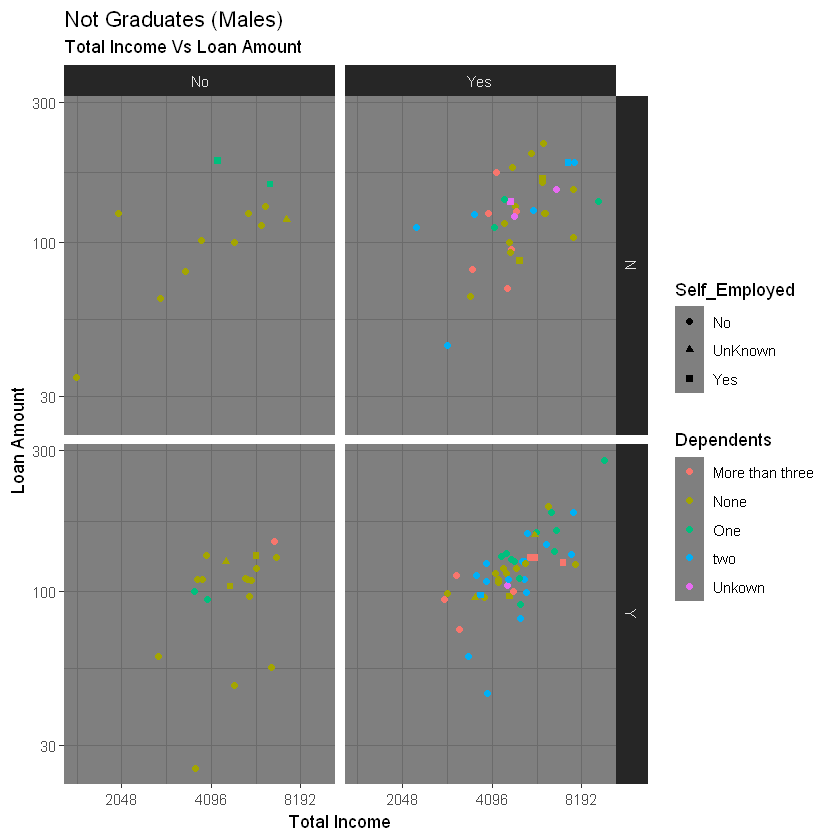

In [8]:
df %>%  filter(Education!="Graduate"& Gender=="Male") %>% 
    ggplot(aes(ApplicantIncome+CoapplicantIncome,LoanAmount, color=Dependents, shape =Self_Employed)) + 
    geom_point() +
    scale_x_continuous(trans = "log2") +
    scale_y_continuous(trans = "log10") +
    facet_grid(rows=vars(Loan_Status),cols=vars(Married)) +
    labs(title="Not Graduates (Males)", subtitle="Total Income Vs Loan Amount") +
    xlab("Total Income") +
    ylab("Loan Amount") + theme_dark()

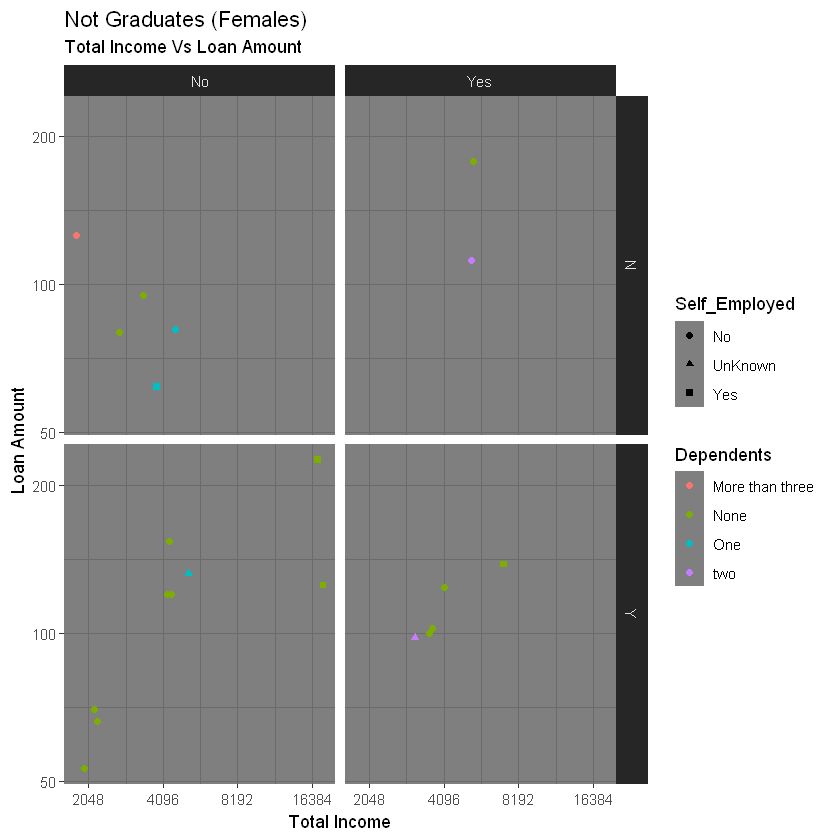

In [9]:
df %>%  filter(Education!="Graduate"& Gender!="Male") %>% 
    ggplot(aes(ApplicantIncome+CoapplicantIncome,LoanAmount, color=Dependents, shape =Self_Employed)) + 
    geom_point() +
    scale_x_continuous(trans = "log2") +
    scale_y_continuous(trans = "log10") +
    facet_grid(rows=vars(Loan_Status),cols=vars(Married)) +
    labs(title="Not Graduates (Females)", subtitle="Total Income Vs Loan Amount") +
    xlab("Total Income") +
    ylab("Loan Amount") + theme_dark()

Warning message:
"Groups with fewer than two data points have been dropped."

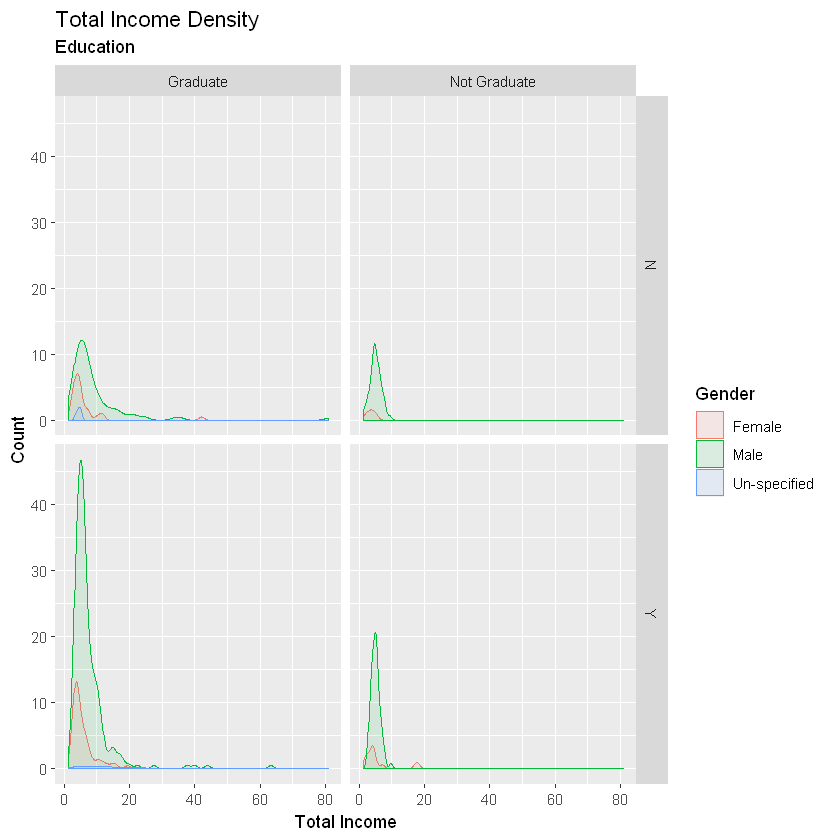

In [10]:
df %>% mutate(TotalIncome=(ApplicantIncome+CoapplicantIncome)/1000) %>%
    ggplot(aes(x=TotalIncome, y = ..count.., color=Gender, fill = Gender)) + 
    geom_density(alpha = 0.1) +
    facet_grid(rows=vars(Loan_Status),cols=vars(Education)) +
    labs(title="Total Income Density", subtitle="Education") +
    xlab("Total Income") +
    ylab("Count") 

Warning message:
"Groups with fewer than two data points have been dropped."

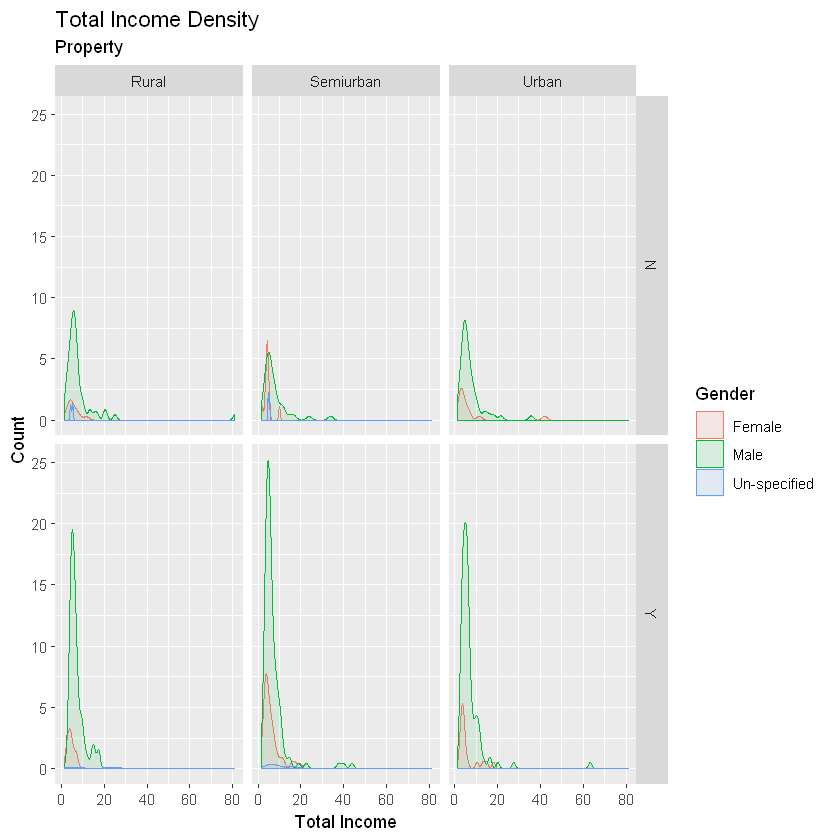

In [11]:
df %>% mutate(TotalIncome=(ApplicantIncome+CoapplicantIncome)/1000) %>%
    ggplot(aes(x=TotalIncome, y = ..count.., color=Gender, fill = Gender)) + 
    geom_density(alpha = 0.1) +
    facet_grid(rows=vars(Loan_Status),cols=vars(Property_Area)) +
    labs(title="Total Income Density", subtitle="Property") +
    xlab("Total Income") +
    ylab("Count") 

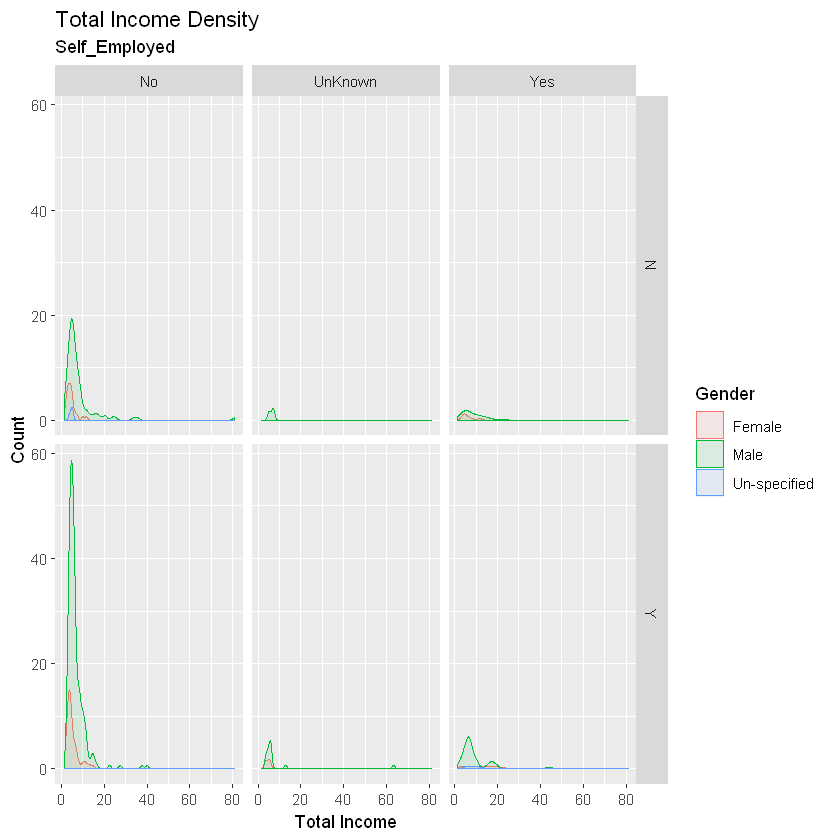

In [12]:
df %>% mutate(TotalIncome=(ApplicantIncome+CoapplicantIncome)/1000) %>%
    ggplot(aes(x=TotalIncome, y = ..count.., color=Gender, fill = Gender)) + 
    geom_density(alpha = 0.1) +
    facet_grid(rows=vars(Loan_Status),cols=vars(Self_Employed)) +
    labs(title="Total Income Density", subtitle="Self_Employed") +
    xlab("Total Income") +
    ylab("Count") 

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."

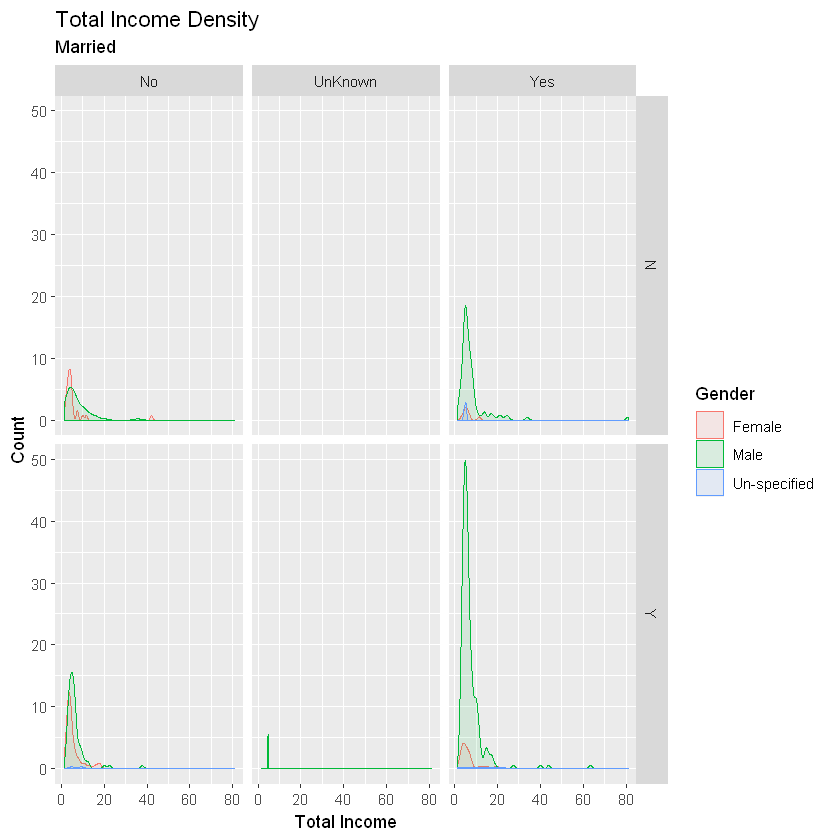

In [13]:
df %>% mutate(TotalIncome=(ApplicantIncome+CoapplicantIncome)/1000) %>%
    ggplot(aes(x=TotalIncome, y = ..count.., color=Gender, fill = Gender)) + 
    geom_density(alpha = 0.1) +
    facet_grid(rows=vars(Loan_Status),cols=vars(Married)) +
    labs(title="Total Income Density", subtitle="Married") +
    xlab("Total Income") +
    ylab("Count") 

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."

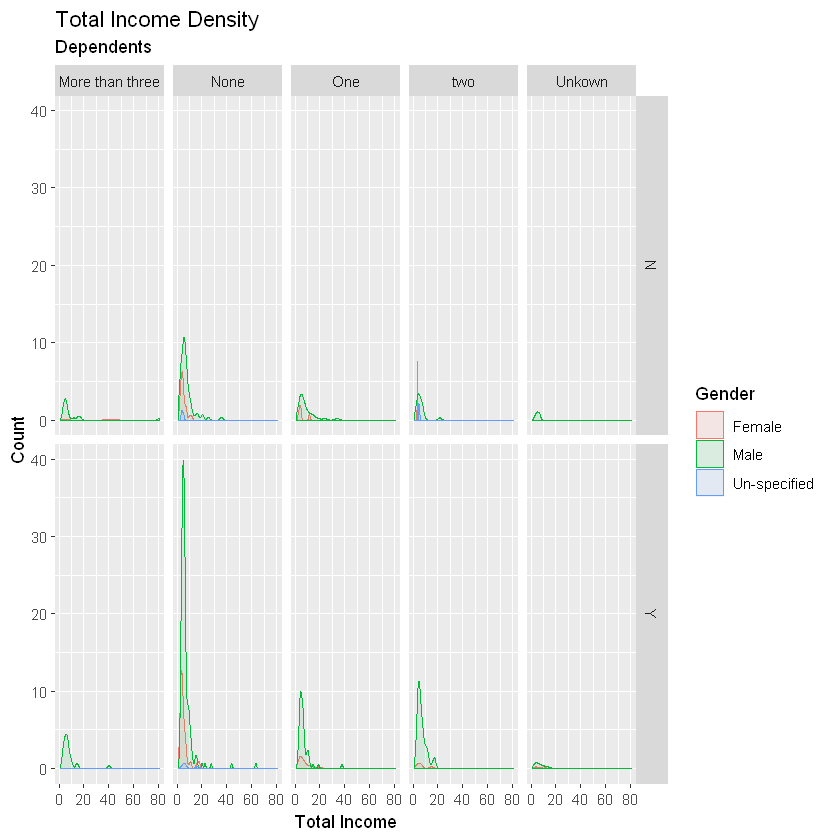

In [14]:
df %>% mutate(TotalIncome=(ApplicantIncome+CoapplicantIncome)/1000) %>%
    ggplot(aes(x=TotalIncome, y = ..count.., color=Gender, fill = Gender)) + 
    geom_density(alpha = 0.1) +
    facet_grid(rows=vars(Loan_Status),cols=vars(Dependents)) +
    labs(title="Total Income Density", subtitle="Dependents") +
    xlab("Total Income") +
    ylab("Count") 

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."

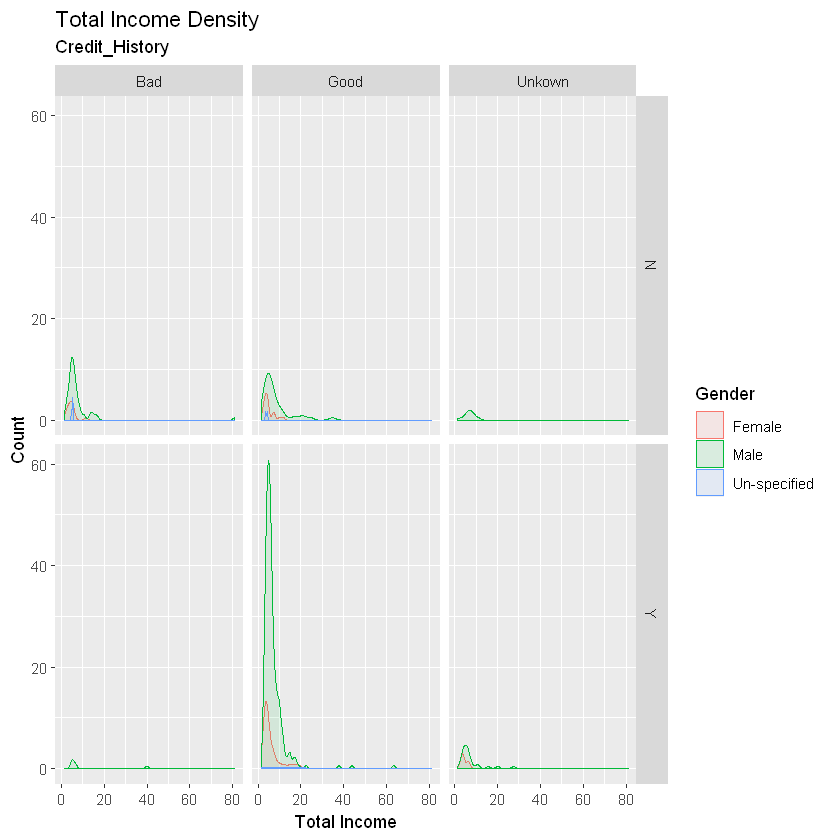

In [15]:
df %>% mutate(TotalIncome=(ApplicantIncome+CoapplicantIncome)/1000) %>%
    ggplot(aes(x=TotalIncome, y = ..count.., color=Gender, fill = Gender)) + 
    geom_density(alpha = 0.1) +
    facet_grid(rows=vars(Loan_Status),cols=vars(Credit_History)) +
    labs(title="Total Income Density", subtitle="Credit_History") +
    xlab("Total Income") +
    ylab("Count") 